In [1]:
from numpy import *
from numpy.linalg import inv
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import json
from datetime import datetime, timedelta

from population import Population
from externalities import World, Offer, Transaction, Event, Categorical

import bandit

In [2]:
population_file_name = 'data/population.json'
population = Population.from_json(population_file_name)

population.transcript_file_name = 'data/transcript.json'
population.transcript_file_name

myBandit = bandit.ContextualBandit(population,cluster_file_name='data/population_clustered.json')

In [3]:
myBandit.add_results_all_seg(population)

print myBandit.design_matrix
print myBandit.respond_vector
print myBandit.context_dim
print myBandit.offer_list

#75,dd,5e=0,1,2
#cur_user = "912eacbf11bd41d9a6e37c3a8c1516eb"
#print myBandit.context(current_user = cur_user,trial_id=0, time_stamp=0)

#ulist = ["1a39664363d94132bf73ccf65e9f0f4b","5aa34e977f374882904a72f10f8e511a","90caaf26b5624e68abb84d43e6c07bec","07dca6a6b8194d53a8d2b85c99346958","c4667d7d14984a698f7214842e042717","912eacbf11bd41d9a6e37c3a8c1516eb","efe6b02c05204d899d1ff300ec98e542"]
#for u in ulist:
#    print myBandit.context(current_user = u,trial_id=0, time_stamp=0)
#    offer_result = myBandit.send_recommendation(current_user = u)
#    print offer_result.id


[array([[ 36.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,  28.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,  11.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   8.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,  17.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,  62.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,  12.]]), array([[ 40.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,  31.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,  32.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,  10.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,  52.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   6.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,  10.]]), array([[ 47.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,  30.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,  27.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,  12.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,  54.,   0.,   0.],
       [  0.,   0.,   0., 

In [4]:
andy = myBandit.cluster_dict.keys()[0]
print myBandit.context(andy, 3, myBandit.time_stamp)
print myBandit.send_recommendation(andy).id
myBandit.recommendation_to_csv(deliveries_file_name='data/test_deliveries.csv')

[0 0 1 0 0 0 0]
cabbc3e9923141b7aba613cac216ede5
('deliver length', 854)


[(u'b18495c5d20e4a8fa4e7332733da7c8f', u'cabbc3e9923141b7aba613cac216ede5'),
 (u'df5f87edb19f45c6805d0c488d9865f2', u'579f62c48505400898b5441da949e2f1'),
 (u'10069c86373345f488a7dcd49a202b74', u'579f62c48505400898b5441da949e2f1'),
 (u'76d6abe5bcf8496892cf8f1632e2cb2b', u'd3299345910a4b678cae2426423f28fc'),
 (u'063c6c2f66c4478aa7aea3ff42d70564', u'cabbc3e9923141b7aba613cac216ede5'),
 (u'2b5d8a17d82e4973ae356ef38fb91a79', u'579f62c48505400898b5441da949e2f1'),
 (u'5d0bcbbecb42435094735131091a8d26', u'cabbc3e9923141b7aba613cac216ede5'),
 (u'9a1b5439eda94e62adb2038dcb269936', u'579f62c48505400898b5441da949e2f1'),
 (u'1c0aa12079134eeb89498e1aaaa28175', u'579f62c48505400898b5441da949e2f1'),
 (u'05f47d6e525c46f7a3458e17245fff93', u'cabbc3e9923141b7aba613cac216ede5'),
 (u'2364b65518934f739a1f639014ded8dd', u'579f62c48505400898b5441da949e2f1'),
 (u'63a58afb50d8474a9a2317cd04505346', u'579f62c48505400898b5441da949e2f1'),
 (u'1c461648761f49a8b8d38204bc6d641e', u'579f62c48505400898b5441da949e2f1'),

In [5]:
population.portfolio.values()[0].to_serializable()

{'channel': {'names': [u'web', u'email', u'mobile', u'social'],
  'weights': [1, 1, 1, 0]},
 'completed': False,
 'difficulty': 5,
 'id': u'75c154ff7a814cfeae81f21d5e0bf053',
 'offer_type': {'names': [u'bogo', u'discount', u'informational'],
  'weights': [0, 1, 0]},
 'progress': 0.0,
 'reward': 2,
 'timestamp': 0,
 'type': 'offer',
 'valid_from': 0,
 'valid_until': 168}

In [11]:
v=np.array([0,0,0,1,0,0,0])
print v.reshape(7,1)
np.matmul(v.reshape(7,1),v.reshape(1,7))

[[0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]]


array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [5]:
stats = dict([(person_id, {'group': 'control',
                           'viewed': 0,
                           'trx': 0,
                           'spend': 0.00}) for person_id in population.people])

transcript_file_name = 'cluster_data/transcript.json'
with open(transcript_file_name, 'r') as transcript_file:
    for line_number, line in enumerate(transcript_file):
        text = line.strip()
        if text != '':
            record = json.loads(text)
        
        if record['event'] == 'offer received':
            stats[record['person']]['group'] = 'target'
        
        if record['event'] == 'offer viewed':
            stats[record['person']]['viewed'] += 1
        
        if record['event'] == 'transaction':
            stats[record['person']]['trx'] += 1
            stats[record['person']]['spend'] += record['value']['amount']

D:\Anaconda3\envs\py27\lib\site-packages\matplotlib\axes\_axes.py:6201: RuntimeWarning: invalid value encountered in true_divide
  m = (m.astype(float) / db) / m.sum()


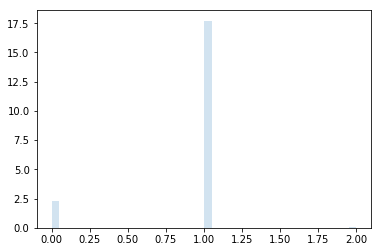

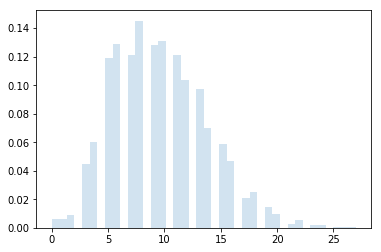

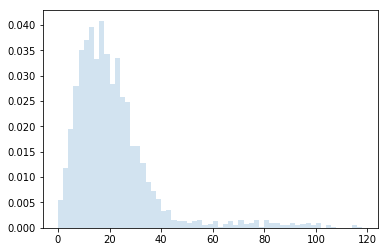

In [6]:
group_stats = {'target': {'viewed': list(), 'trx': list(), 'spend': list()},
               'control': {'viewed': list(), 'trx': list(), 'spend': list()}}

for val in stats.values():
    group = val['group']
    for field in ['viewed', 'trx', 'spend']:
        group_stats[group][field].append(val[field])

plt.hist(group_stats['target']['viewed'], bins=40, normed=True, alpha=0.2);
plt.hist(group_stats['control']['viewed'], bins=40, normed=True, alpha=0.2);
plt.show()

plt.hist(group_stats['target']['trx'], bins=40, normed=True, alpha=0.2);
plt.hist(group_stats['control']['trx'], bins=40, normed=True, alpha=0.2);
plt.show()

plt.hist(group_stats['target']['spend'], bins=range(0, 120, 2), normed=True, alpha=0.2);
plt.hist(group_stats['control']['spend'], bins=range(0, 120, 2), normed=True, alpha=0.2);
plt.show()